In [5]:
def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)

In [6]:
from sklearn import datasets
digits = datasets.load_digits()

In [7]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

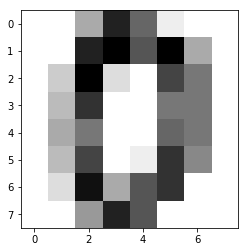

In [8]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)

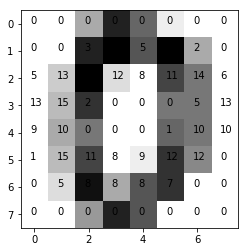

In [18]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)
for i in range(0,8):
    for j in range(0,8):
        plt.gca().text(i-0.15,j,int(digits.images[0][i][j]))

In [21]:
import numpy as np
np.matrix.flatten(digits.images[0]) / 15.

array([0.        , 0.        , 0.33333333, 0.86666667, 0.6       ,
       0.06666667, 0.        , 0.        , 0.        , 0.        ,
       0.86666667, 1.        , 0.66666667, 1.        , 0.33333333,
       0.        , 0.        , 0.2       , 1.        , 0.13333333,
       0.        , 0.73333333, 0.53333333, 0.        , 0.        ,
       0.26666667, 0.8       , 0.        , 0.        , 0.53333333,
       0.53333333, 0.        , 0.        , 0.33333333, 0.53333333,
       0.        , 0.        , 0.6       , 0.53333333, 0.        ,
       0.        , 0.26666667, 0.73333333, 0.        , 0.06666667,
       0.8       , 0.46666667, 0.        , 0.        , 0.13333333,
       0.93333333, 0.33333333, 0.66666667, 0.8       , 0.        ,
       0.        , 0.        , 0.        , 0.4       , 0.86666667,
       0.66666667, 0.        , 0.        , 0.        ])

In [22]:
def random_classifier(input_vector):
    return np.random.rand(10)

In [25]:
v = np.matrix.flatten(digits.images[0]) / 15.
result = random_classifier(v)
result

array([0.78426486, 0.42120868, 0.47890909, 0.53200335, 0.91508751,
       0.1227552 , 0.73501115, 0.71711834, 0.38744159, 0.73556909])

In [27]:
list(result).index(max(result))

4

In [30]:
digits.target[0]

0

In [7]:
digits.images[5]
# digits.target[5]
len(digits.images)

1797

In [39]:
def test_digit_classify(classifier,test_count=1000):
    correct = 0
    for img, target in zip(digits.images[:test_count], digits.target[:test_count]):
        v = np.matrix.flatten(img) / 15.
        output = classifier(v)
        answer = list(output).index(max(output))
        if answer == target:
            correct += 1
    return (correct/test_count) 

In [234]:
def test_digit_classify(classifier,start=0,test_count=1000):
    correct = 0
    end = start + test_count
    for img, target in zip(digits.images[start:end], digits.target[start:end]):
        v = np.matrix.flatten(img) / 15.
        output = classifier(v)
        answer = list(output).index(max(output))
        if answer == target:
            correct += 1
    return (correct/test_count) 

In [59]:
test_digit_classify(random_classifier)

0.107

In [321]:
from math import exp
def sigmoid(x):
    return 1 / (1+exp(-x))

In [68]:
def average_img(i):
    imgs = [img for img,target in zip(digits.images[1000:], digits.target[1000:]) if target==i]
    return sum(imgs) / len(imgs)

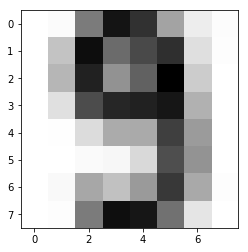

In [69]:
plt.imshow(average_img(9), cmap=plt.cm.gray_r)

In [289]:
avg_digits = [np.matrix.flatten(average_img(i)) for i in range(10)]
def compare_to_avg(v):
    return [np.dot(v,avg_digits[i]) for i in range(10)]

In [290]:
test_digit_classify(compare_to_avg)

0.853

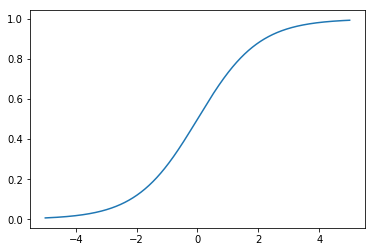

In [70]:
plot_function(sigmoid,-5,5)

In [171]:
def one_index(lst):
    return [None] + lst

def zero_index(lst):
    return lst[1:]

class NeuralNetwork():
    def __init__(self,layer_sizes):
        self.layer_sizes = layer_sizes
        self.layer_count = len(layer_sizes)
        self.depth = self.layer_count - 1
        self.weights = [
            np.random.rand(n,m) 
            for m,n in zip(layer_sizes[:-1],layer_sizes[1:])
        ]
        self.biases = [np.random.rand(n) for n in layer_sizes[1:]]

    def feedforward(self,v):
        activations = []
        a = v
        activations.append(a)
        for w,b in zip(self.weights, self.biases):
            z = w @ a + b
            a = [sigmoid(x) for x in z]
            activations.append(a)
        return activations
    
    def evaluate(self,v):
        return np.array(self.feedforward(v)[-1])
    
    def classify(self,v):
        result = self.evaluate(v)
        return result.index(max(result))
    
    def cost(self,x,y):
        return 0.5 * np.linalg.norm(np.array(self.evaluate(x))-y)

class MLP():
    def __init__(self,layer_sizes):
        self.layer_sizes = layer_sizes
        self.weights = [
            np.random.rand(n,m) 
            for m,n in zip(layer_sizes[:-1],layer_sizes[1:])
        ]
        self.biases = [np.random.rand(n) for n in layer_sizes[1:]]

    def feedforward(self,v):
        activations = []
        a = v
        activations.append(a)
        for w,b in zip(self.weights, self.biases):
            z = w @ a + b
            a = [sigmoid(x) for x in z]
            activations.append(a)
        return activations
    
    def evaluate(self,v):
        return np.array(self.feedforward(v)[-1])
    
# def errors(nn,a,l,y):
#     nl = nn.layer_sizes[l]
#     if l == nn.layer_count - 1:
#         return np.array([(y - a[l][i]) * (a[l][i] * (1-a[l][i])) for i in range(0,nl)])
#     else:
#         return nn.weights[l+1].transpose() @ errors(nn,a,l+1)

# def weight_derivative(nn,a,i,j,l,y):
#     w = nn.weights
#     d = errors(l)
#     return a[l-1][j] * d[j]

# def bias_derivative(nn,a,l,j,y):
#     return errors(nn,a,l,y)[j]

def backpropagate_errors(nn,a,y):
    d = one_index([])
    w = one_index(nn.weights)
    n = nn.layer_sizes
    one_to_depth = range(1,nn.depth+1)
    
    # default to zero
    for l in one_to_depth:
        d.append(np.zeros(n[l]))
        
    for l in reversed(one_to_depth):
#         print("working on layer %d" % l)
#         print("al: ", a[l])
        nl = nn.layer_sizes[l]
        if l == nn.depth:
#             print("last layer!",l,nn.depth)
            for j in range(n[l]):
                d[l][j] = (y[j] - a[l][j]) * (a[l][j] * (1-a[l][j]))
#                 print(d[l][j])
#             print("last layer errors", a[l], y, d[l])
        else:
            for j in range(n[l]):
                for i in range(n[l+1]):
                    d[l][j] +=  w[l+1][i][j] * a[l+1][i] * (a[l][j] * (1-a[l][j]))
    return d
    
def gradient_descend(nn,x,y,learning_rate=0.01):
    # only uses one training example!
    n = nn.layer_sizes
    a = nn.feedforward(x)
    d = zero_index(backpropagate_errors(nn,a,y))
    for l in range(nn.depth):
        nn.biases[l] -= learning_rate * d[l]
        nn.weights[l] -= learning_rate * np.outer(d[l], a[l])
        

In [175]:
nn = MLP([2,3])

In [176]:
nn.weights

[array([[0.45390063, 0.02891635],
        [0.15418494, 0.70165829],
        [0.88135556, 0.50607624]])]

In [177]:
nn.biases

[array([0.08668222, 0.35470513, 0.98076987])]

In [297]:
nn = MLP([64,16,10])
v = np.matrix.flatten(digits.images[0]) / 15.
nn.evaluate(v)

array([0.99997438, 0.99956529, 0.99993977, 0.99980181, 0.99969905,
       0.99970184, 0.99969177, 0.99994229, 0.99934346, 0.99976804])

In [187]:
foo = np.array([0.99990572, 0.9987683 , 0.99994929, 0.99978464, 0.99989691,
       0.99983505, 0.99991699, 0.99931011, 0.99988506, 0.99939445])
list(foo).index(max(foo))

2

In [71]:
random_classifier([])

array([0.23884121, 0.46890743, 0.61813257, 0.90002886, 0.57173905,
       0.26043427, 0.26267393, 0.31282035, 0.0999781 , 0.38209293])

In [72]:
# first = random_ann([64,16,10])
second = NeuralNetwork([64,16,10])

In [73]:
test_x = np.matrix.flatten(digits.images[35]) / 15.


In [74]:
second.feedforward(test_x)

[array([0.        , 0.2       , 1.        , 0.53333333, 0.53333333,
        0.4       , 0.        , 0.        , 0.        , 0.26666667,
        1.06666667, 1.06666667, 1.06666667, 0.86666667, 0.13333333,
        0.        , 0.        , 0.2       , 1.06666667, 0.6       ,
        0.13333333, 0.        , 0.        , 0.        , 0.        ,
        0.13333333, 1.06666667, 1.06666667, 1.        , 0.2       ,
        0.        , 0.        , 0.        , 0.        , 0.46666667,
        0.4       , 0.8       , 0.6       , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.06666667, 0.93333333,
        0.66666667, 0.        , 0.        , 0.        , 0.        ,
        0.33333333, 0.93333333, 1.        , 0.13333333, 0.        ,
        0.        , 0.        , 0.06666667, 1.        , 0.93333333,
        0.06666667, 0.        , 0.        , 0.        ]),
 [0.9999775831303461,
  0.9999949770932633,
  0.999997114430989,
  0.9992134037688372,
  0.9999585076878017,
  0.9999483032151

In [100]:
def plot_activations(ff): 
    xs = []
    ys = []
    cs = []
    ss = []
    for layer_index,layer in enumerate(ff):
        for activation_index, activation in enumerate(layer):
            xs.append(layer_index / (len(ff)-1))
            ys.append(activation_index / (len(layer)-1))
            cs.append(activation)
            ss.append(300 if layer_index > 0 else 50)
        if layer_index + 1 < len(ff):
            next_layer = ff[layer_index + 1]
            for act_index,cur in enumerate(layer):
                for next_act_index,nxt in enumerate(next_layer):
                    x = layer_index / (len(ff)-1)
                    next_x = (layer_index+1) / (len(ff)-1)
                    y = act_index / (len(layer)-1)
                    next_y = next_act_index / (len(next_layer)-1)
                    plt.plot([x,next_x],[y,next_y],c='gray',zorder=0)
    plt.scatter(xs,ys,c=cs,s=ss,cmap=plt.cm.gray_r,edgecolors='k',zorder=1)

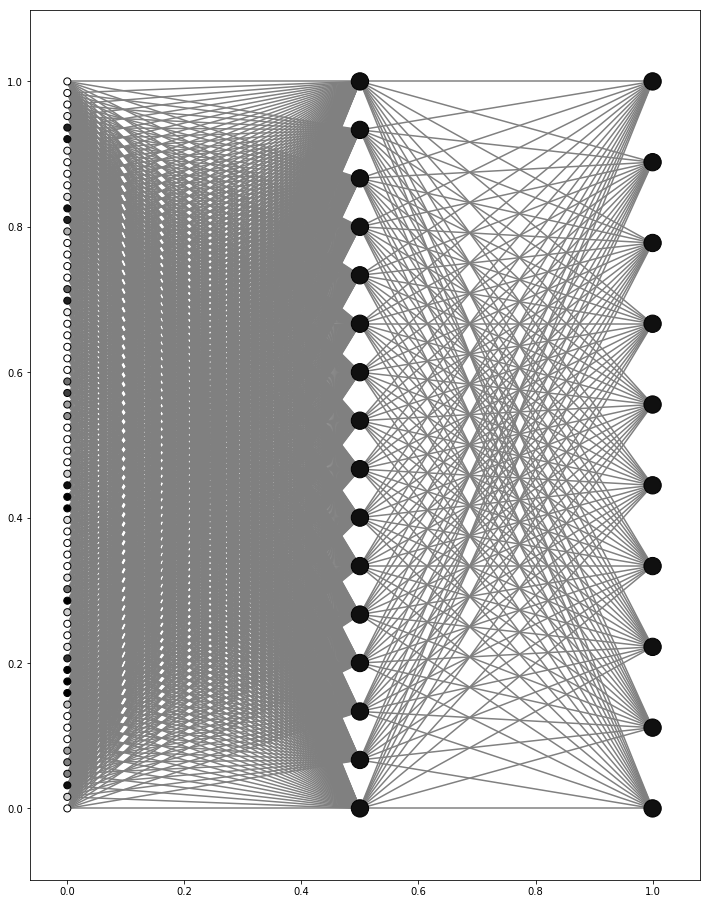

In [103]:
plot_activations(second.feedforward(test_x))
plt.gcf().set_size_inches(12,16)

In [167]:
def sketch_mlp(*layer_sizes,show_labels=True): 
    xs = []
    ys = []
    labels = []
    for layer_index,layer in enumerate(layer_sizes):
        for i in range(layer):
            xs.append(layer_index)
            ys.append(layer/2-i)
            labels.append("$a^{%d}_{%d}$" % (layer_index,i+1))
        if layer_index + 1 < len(layer_sizes):
            next_layer = layer_sizes[layer_index+1]
            for i in range(layer):
                for j in range(next_layer):
                    x = layer_index
                    next_x = layer_index+1
                    y = layer/2-i
                    next_y = next_layer/2-j
                    plt.plot([x,next_x],[y,next_y],c='#dddddd',zorder=0)
    print(xs,ys)
    plt.scatter(xs,ys,c='white',edgecolors='k',s=1500,zorder=1)
    if show_labels:
        for i in (range(len(xs))):
            plt.scatter([xs[i]],[ys[i]],marker=labels[i],s=500,c='k')

[0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3] [1.5, 0.5, -0.5, 2.0, 1.0, 0.0, -1.0, 1.5, 0.5, -0.5, 1.0, 0.0]


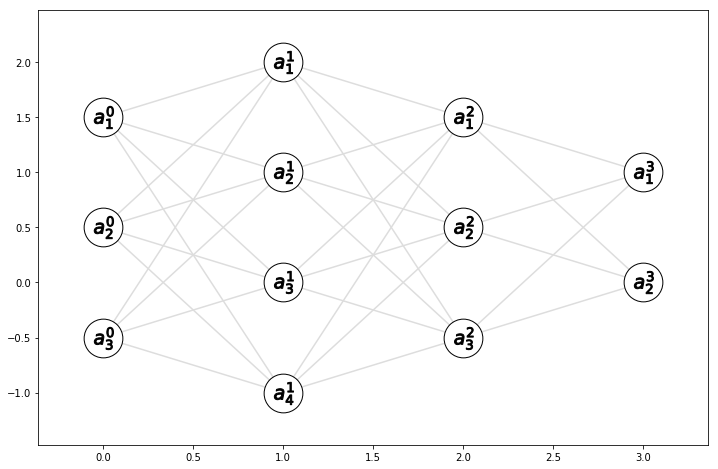

In [168]:
sketch_mlp(3,4,3,2)
plt.gcf().set_size_inches(12,8)

[0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3] [1.5, 0.5, -0.5, 2.0, 1.0, 0.0, -1.0, 1.5, 0.5, -0.5, 1.0, 0.0]


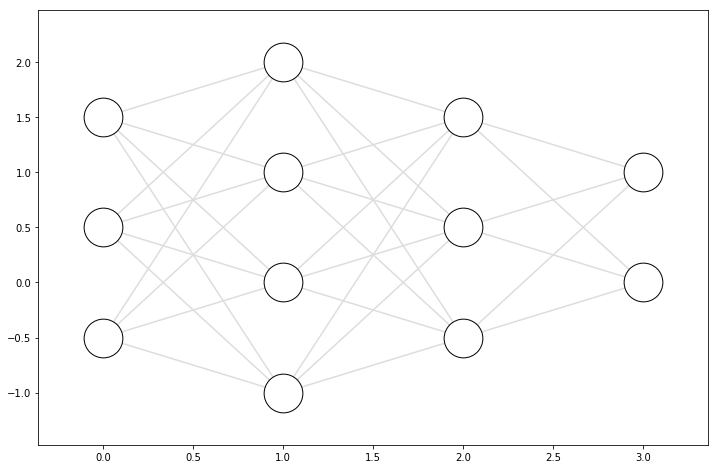

In [170]:
sketch_mlp(3,4,3,2,show_labels=False)
plt.gcf().set_size_inches(12,8)

In [192]:
test_digit_classify(nn.evaluate)

0.1

In [ ]:
second.cost(test_x,y_vec(5))

In [ ]:
for i in range(0,10000):
    gradient_descend(second,test_x,y_vec(5))
    print(second.cost(test_x,y_vec(5)))

In [ ]:
sigmoid((second.weights[0] @ test_x)[0])

In [ ]:
def y_vec(digit):
    return np.array([1 if i == digit else 0 for i in range(0,10)])
y_vec(5)

In [ ]:
x = np.matrix.flatten(digits.images[35])
y = y_vec(5)
backpropagate_errors(second,second.feedforward(test_x),y)

In [ ]:
evaluate(first,np.matrix.flatten(digits.images[35]))

In [ ]:
classify(first,np.matrix.flatten(digits.images[35]))

In [ ]:
second.evaluate(np.matrix.flatten(digits.images[35]))

In [ ]:
second.classify(np.matrix.flatten(digits.images[35]))

In [ ]:
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[35], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [ ]:
digits.target[0]

In [ ]:
list(range(5))

In [ ]:
reversed(range(0,4))

In [ ]:
test_m = np.array([[1,2],[3,4]])
test_m[1,1]

In [251]:


# # Load data from https://www.openml.org/d/554
# X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
# X = X / 255.


x = np.array([np.matrix.flatten(img) for img in digits.images[:1000]]) / 15.0
y = digits.target[:1000]

In [252]:
# rescale the data, use the traditional train/test split
# X_train, X_test = X[:1000], X[1000:]
# y_train, y_test = y[:1000], y[1000:]

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(16,), 
                    activation='logistic', 
                    max_iter=100,
                    verbose=10, 
                    random_state=1,
                    learning_rate_init=.1)

In [253]:
mlp.fit(x,y)
# print("Training set score: %f" % mlp.score(X_train, y_train))
# print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 2.21958598
Iteration 2, loss = 1.56912978
Iteration 3, loss = 0.98970277
Iteration 4, loss = 0.57473464
Iteration 5, loss = 0.34048448
Iteration 6, loss = 0.21495855
Iteration 7, loss = 0.14366771
Iteration 8, loss = 0.11077020
Iteration 9, loss = 0.08764273
Iteration 10, loss = 0.07193546
Iteration 11, loss = 0.06020348
Iteration 12, loss = 0.04961899
Iteration 13, loss = 0.03979645
Iteration 14, loss = 0.03334502
Iteration 15, loss = 0.02996006
Iteration 16, loss = 0.02603968
Iteration 17, loss = 0.02355514
Iteration 18, loss = 0.02137348
Iteration 19, loss = 0.01967878
Iteration 20, loss = 0.01751214
Iteration 21, loss = 0.01617330
Iteration 22, loss = 0.01460386
Iteration 23, loss = 0.01408517
Iteration 24, loss = 0.01270504
Iteration 25, loss = 0.01191634
Iteration 26, loss = 0.01114222
Iteration 27, loss = 0.01045989
Iteration 28, loss = 0.00983648
Iteration 29, loss = 0.00920912
Iteration 30, loss = 0.00890851
Iteration 31, loss = 0.00843426
Iteration 32, los

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(16,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False)

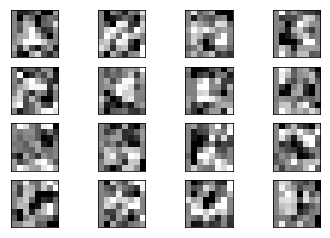

In [249]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(8,8), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [250]:
mlp.coefs_[0].shape

(64, 16)

In [308]:
# nn.weights = mlp.coefs_.T 
nn = MLP([64,16,10])
nn.weights = [w.T for w in mlp.coefs_]
nn.biases = mlp.intercepts_

In [309]:
test_digit_classify(nn.evaluate,start=1000,test_count=500)

0.962

In [307]:
test_digit_classify(sklearn_classify,start=1000,test_count=500)

0.962

In [236]:
nn.evaluate(np.matrix.flatten(digits.images[0]) / 15.)

array([9.99975782e-01, 3.48294341e-06, 1.25621136e-01, 6.15507025e-03,
       7.22906568e-02, 5.87359041e-01, 2.04860661e-01, 8.18297237e-01,
       4.57139074e-03, 7.63073988e-01])

In [279]:
mlp._predict(x)[4]

array([5.00512567e-06, 3.94168539e-05, 5.57124430e-09, 9.31981207e-09,
       9.98060276e-01, 9.10328786e-07, 1.56262695e-03, 1.82976466e-04,
       1.48519455e-04, 2.54354113e-07])

In [300]:
def y_vec(digit):
    return np.array([1 if i == digit else 0 for i in range(0,10)])

def cost_one(classifier,x,i):
    return sum([(classifier(x)[j] - y_vec(i)[j])**2 for j in range(10)])

def total_cost(classifier):
    return sum([cost_one(classifier,x[j],y[j]) for j in range(1000)])/1000.

In [303]:
total_cost(MLP([64,16,10]).evaluate)

8.988715232706323

In [304]:
total_cost(sklearn_classify)

5.670512721637246e-05

In [276]:
def sklearn_trained_classify(v):
    return mlp._predict([v])[0]

In [277]:
test_digit_classify(sklearn_trained_classify)

1.0

In [278]:
test_digit_classify(sklearn_trained_classify,1000,500)

0.962

In [ ]:
nn.evaluate()

In [207]:
test_x

array([0.        , 0.2       , 1.        , 0.53333333, 0.53333333,
       0.4       , 0.        , 0.        , 0.        , 0.26666667,
       1.06666667, 1.06666667, 1.06666667, 0.86666667, 0.13333333,
       0.        , 0.        , 0.2       , 1.06666667, 0.6       ,
       0.13333333, 0.        , 0.        , 0.        , 0.        ,
       0.13333333, 1.06666667, 1.06666667, 1.        , 0.2       ,
       0.        , 0.        , 0.        , 0.        , 0.46666667,
       0.4       , 0.8       , 0.6       , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.06666667, 0.93333333,
       0.66666667, 0.        , 0.        , 0.        , 0.        ,
       0.33333333, 0.93333333, 1.        , 0.13333333, 0.        ,
       0.        , 0.        , 0.06666667, 1.        , 0.93333333,
       0.06666667, 0.        , 0.        , 0.        ])

In [208]:
# len(mlp.coefs_[0].T)
len(mlp.intercepts_[0])

16

In [209]:
mlp.__dict__

{'activation': 'logistic',
 'solver': 'adam',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'learning_rate': 'constant',
 'learning_rate_init': 0.1,
 'power_t': 0.5,
 'max_iter': 100,
 'loss': 'log_loss',
 'hidden_layer_sizes': (16,),
 'shuffle': True,
 'random_state': 1,
 'tol': 0.0001,
 'verbose': 10,
 'warm_start': False,
 'momentum': 0.9,
 'nesterovs_momentum': True,
 'early_stopping': False,
 'validation_fraction': 0.1,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-08,
 '_label_binarizer': LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False),
 'classes_': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'n_outputs_': 10,
 '_random_state': <mtrand.RandomState at 0x20d5fceff78>,
 'n_iter_': 60,
 't_': 60000,
 'n_layers_': 3,
 'out_activation_': 'softmax',
 'coefs_': [array([[ 2.47681707e-09, -1.05221235e-08,  9.38767046e-09, ...,
          -1.60340914e-08, -1.25955053e-08,  6.82498990e-09],
         [-1.66892955e+00, -2.99998253e+00,  1.53221104e+00, ...,
          -1.90726981e+00, -

In [210]:
vsigmoid = np.vectorize(sigmoid)
vsigmoid(mlp.coefs_[1].T @ vsigmoid(mlp.coefs_[0].T @ test_x + mlp.intercepts_[0]) + mlp.intercepts_[1]) 

array([0.04583639, 0.01247717, 0.01113128, 0.27467824, 0.00225421,
       0.99998428, 0.00516301, 0.81111417, 0.05772724, 0.60509815])

ValueError: Expected 2D array, got 1D array instead:
array=[0.         0.2        1.         0.53333333 0.53333333 0.4
 0.         0.         0.         0.26666667 1.06666667 1.06666667
 1.06666667 0.86666667 0.13333333 0.         0.         0.2
 1.06666667 0.6        0.13333333 0.         0.         0.
 0.         0.13333333 1.06666667 1.06666667 1.         0.2
 0.         0.         0.         0.         0.46666667 0.4
 0.8        0.6        0.         0.         0.         0.
 0.         0.06666667 0.93333333 0.66666667 0.         0.
 0.         0.         0.33333333 0.93333333 1.         0.13333333
 0.         0.         0.         0.06666667 1.         0.93333333
 0.06666667 0.         0.         0.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [202]:
mlp.out_activation_

'softmax'

In [316]:
from sympy import *

In [319]:
from sympy import *
X = symbols('x')
diff(1 / (1+sympy.exp(-X)),X)

In [326]:
diff(1 / (1+sympy.exp(-X)),X)

exp(-x)/(1 + exp(-x))**2